In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv("Data file.csv")
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
data.shape

(209593, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [6]:
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
data.drop(columns=["Unnamed: 0","daily_decr30","rental30","medianamnt_loans30","maxamnt_loans30","fr_da_rech30",
                    "amnt_loans30","cnt_loans30","cnt_da_rech30","medianmarechprebal30","medianamnt_ma_rech30",
                     "cnt_ma_rech30","fr_ma_rech30","payback30","sumamnt_ma_rech30","pcircle","pdate","msisdn"], axis=1, inplace=True)                     

In [8]:
data.drop_duplicates(inplace=True)

In [10]:
data.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21,3078,1539.0,7.50,0,0,2.0,12,6,0.0,29.000000
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0,5787,5787.0,61.04,0,0,1.0,12,12,0.0,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0,1539,1539.0,66.32,0,0,1.0,6,6,0.0,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,1,0,947,947.0,2.50,0,0,2.0,12,6,0.0,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,8,2,23496,2888.0,35.00,0,0,7.0,42,6,0.0,2.333333


In [11]:
data.shape

(209191, 19)

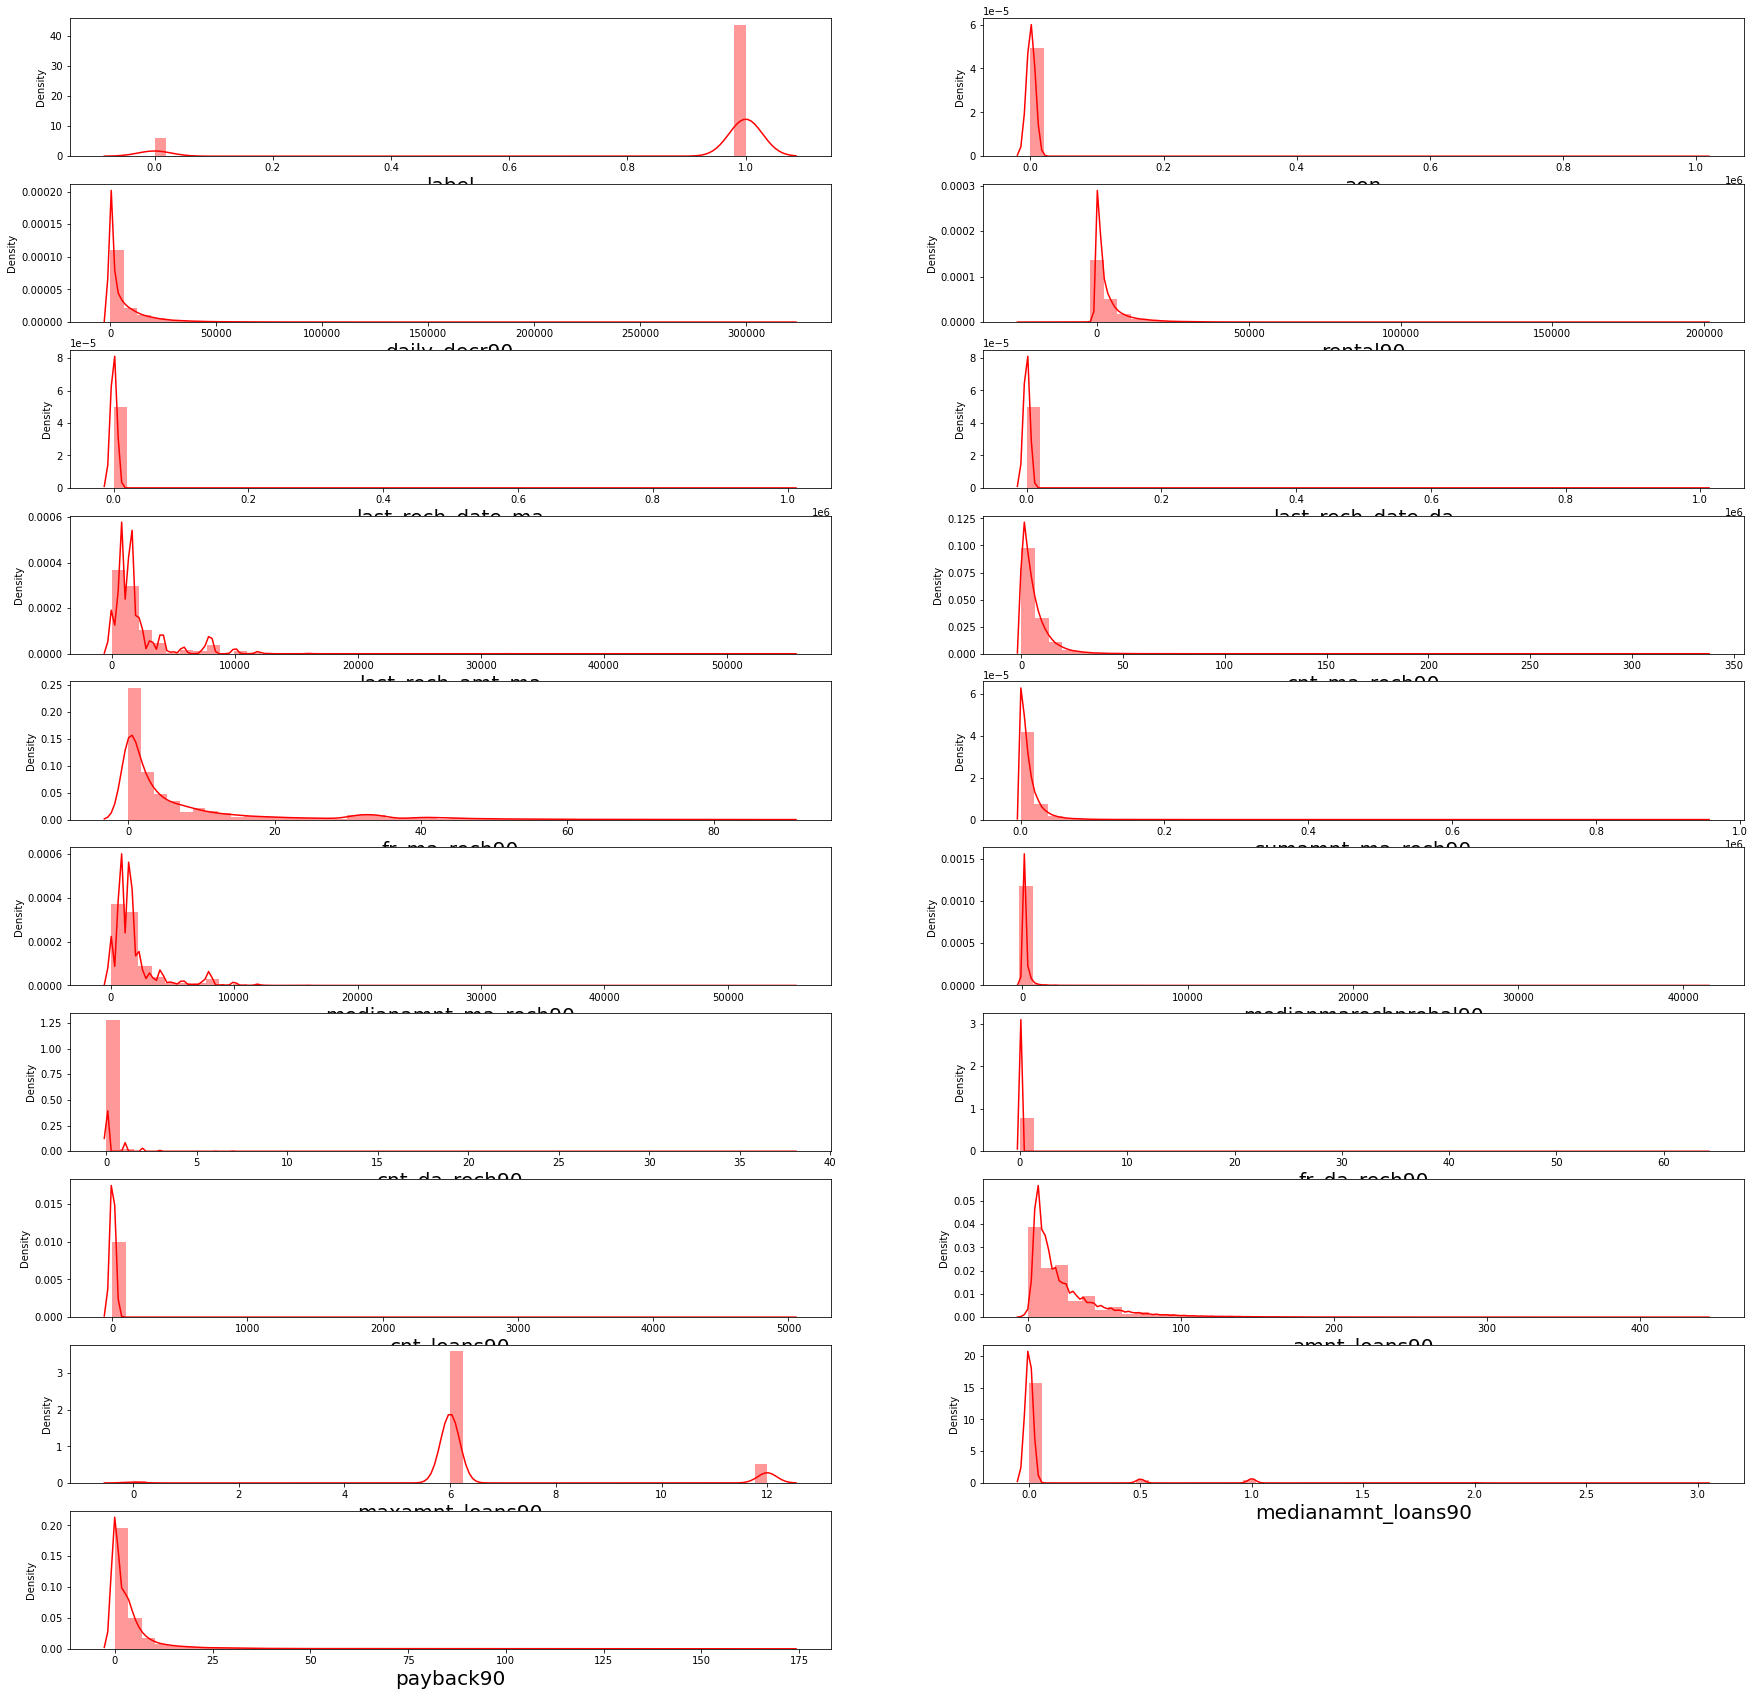

In [12]:
plt.figure(figsize=(30,30))
plotnumber=1

for column in data:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(data[column], color="red")
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.show()

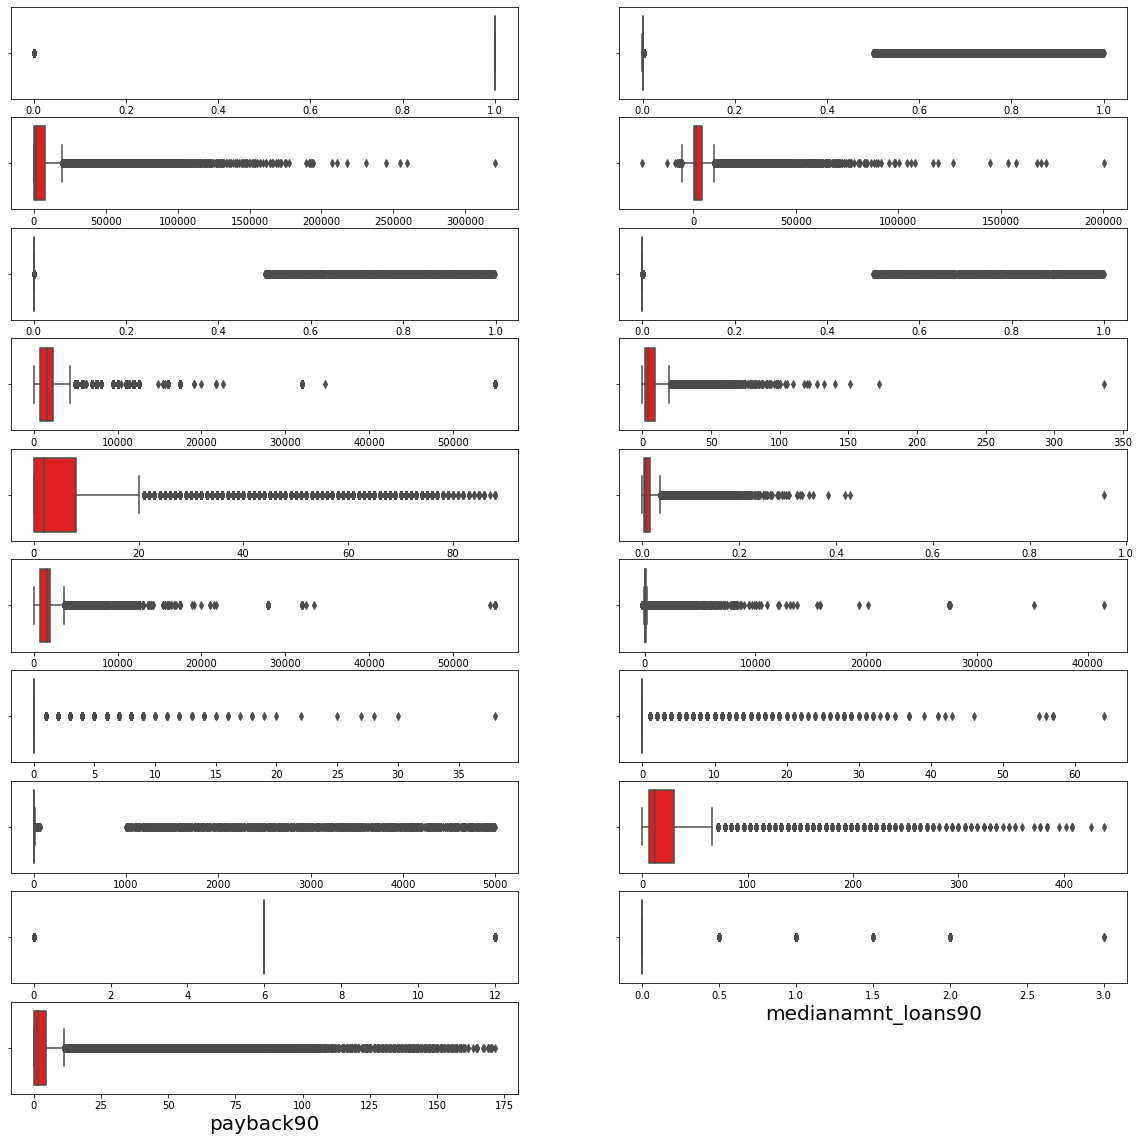

In [13]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.boxplot(data[column], color="red")
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.show()

In [14]:
z_score =zscore(data[['cnt_ma_rech90','sumamnt_ma_rech90','amnt_loans90','daily_decr90','last_rech_amt_ma','medianamnt_ma_rech90','maxamnt_loans90','fr_ma_rech90','rental90','payback90','label']])

abs_z_score =np.abs(z_score)  

filtering_entry =(abs_z_score < 3).all(axis=1)

data =data[filtering_entry]

data.describe()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
count,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000,182492.000000
mean,0.867868,8023.690298,4335.998925,2616.161510,3682.225509,3671.819081,1807.089768,5.458902,6.750745,9709.059734,1649.136047,82.460415,0.039711,0.044418,18.240937,20.842185,6.635863,0.047197,3.274201
std,0.338635,75240.394822,6695.657515,3704.172824,53497.356507,53113.339066,1827.726707,5.174272,10.527741,10290.386291,1630.819669,226.677362,0.364646,0.928979,226.267396,18.976279,1.846856,0.203670,5.212181
min,0.000000,-48.000000,-41.755000,-7786.750000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
25%,1.000000,241.000000,35.583833,265.400000,1.000000,0.000000,770.000000,1.000000,0.000000,2309.000000,771.500000,13.600000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,519.000000,1000.000000,1120.330000,3.000000,0.000000,1539.000000,4.000000,2.000000,6365.000000,1539.000000,34.500000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.500000
75%,1.000000,971.000000,6204.000000,3417.372500,7.000000,0.000000,1924.000000,8.000000,8.000000,13884.000000,1547.000000,77.000000,0.000000,0.000000,4.000000,30.000000,6.000000,0.000000,4.500000
max,1.000000,999860.755168,38868.950000,20810.990000,997717.809631,997920.294292,8000.000000,27.000000,45.000000,62995.000000,8000.000000,20210.500000,30.000000,64.000000,4997.517944,102.000000,12.000000,3.000000,35.250000


In [15]:
data.head() 

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21,3078,1539.0,7.50,0,0,2.0,12,6,0.0,29.000000
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0,5787,5787.0,61.04,0,0,1.0,12,12,0.0,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0,1539,1539.0,66.32,0,0,1.0,6,6,0.0,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,1,0,947,947.0,2.50,0,0,2.0,12,6,0.0,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,8,2,23496,2888.0,35.00,0,0,7.0,42,6,0.0,2.333333


In [16]:
from sklearn.feature_selection import SelectKBest , f_classif

In [17]:
X =data.drop(['label'], axis=1)
y =data['label']

In [18]:
# selecting top 10 best features 
best_features =SelectKBest(score_func=f_classif, k=10)

In [19]:
fit =best_features.fit(X,y)

In [20]:
data_scores =pd.DataFrame(fit.scores_)

In [21]:
data_columns =pd.DataFrame(X.columns)

In [22]:
feature_scores =pd.concat([data_columns,data_scores], axis=1)

In [23]:
feature_scores.columns =['Feature_Name','Score'] 

In [24]:
# print 10 best features

print(feature_scores.nlargest(10,'Score'))

            Feature_Name         Score
6          cnt_ma_rech90  15617.077257
8      sumamnt_ma_rech90  13284.163371
14          amnt_loans90  10639.489298
1           daily_decr90   6544.401675
5       last_rech_amt_ma   4272.260835
9   medianamnt_ma_rech90   3630.850304
17             payback90   2858.392930
7           fr_ma_rech90   2509.991648
15       maxamnt_loans90   1442.293190
10  medianmarechprebal90    863.965594


In [25]:
new_X =X[['cnt_ma_rech90','sumamnt_ma_rech90','amnt_loans90','daily_decr90','last_rech_amt_ma','medianamnt_ma_rech90',
             'maxamnt_loans90','fr_ma_rech90','rental90','payback90']] 

In [26]:
new_X.head()

,cnt_ma_rech90,sumamnt_ma_rech90,amnt_loans90,daily_decr90,last_rech_amt_ma,medianamnt_ma_rech90,maxamnt_loans90,fr_ma_rech90,rental90,payback90
0,2,3078,12,3065.150000,1539,1539.0,6,21,260.13,29.000000
1,1,5787,12,12124.750000,5787,5787.0,12,0,3691.26,0.000000
2,1,1539,6,1398.000000,1539,1539.0,6,0,900.13,0.000000
3,1,947,12,21.228000,947,947.0,6,0,159.42,0.000000
4,8,23496,42,150.619333,2309,2888.0,6,2,1098.90,2.333333


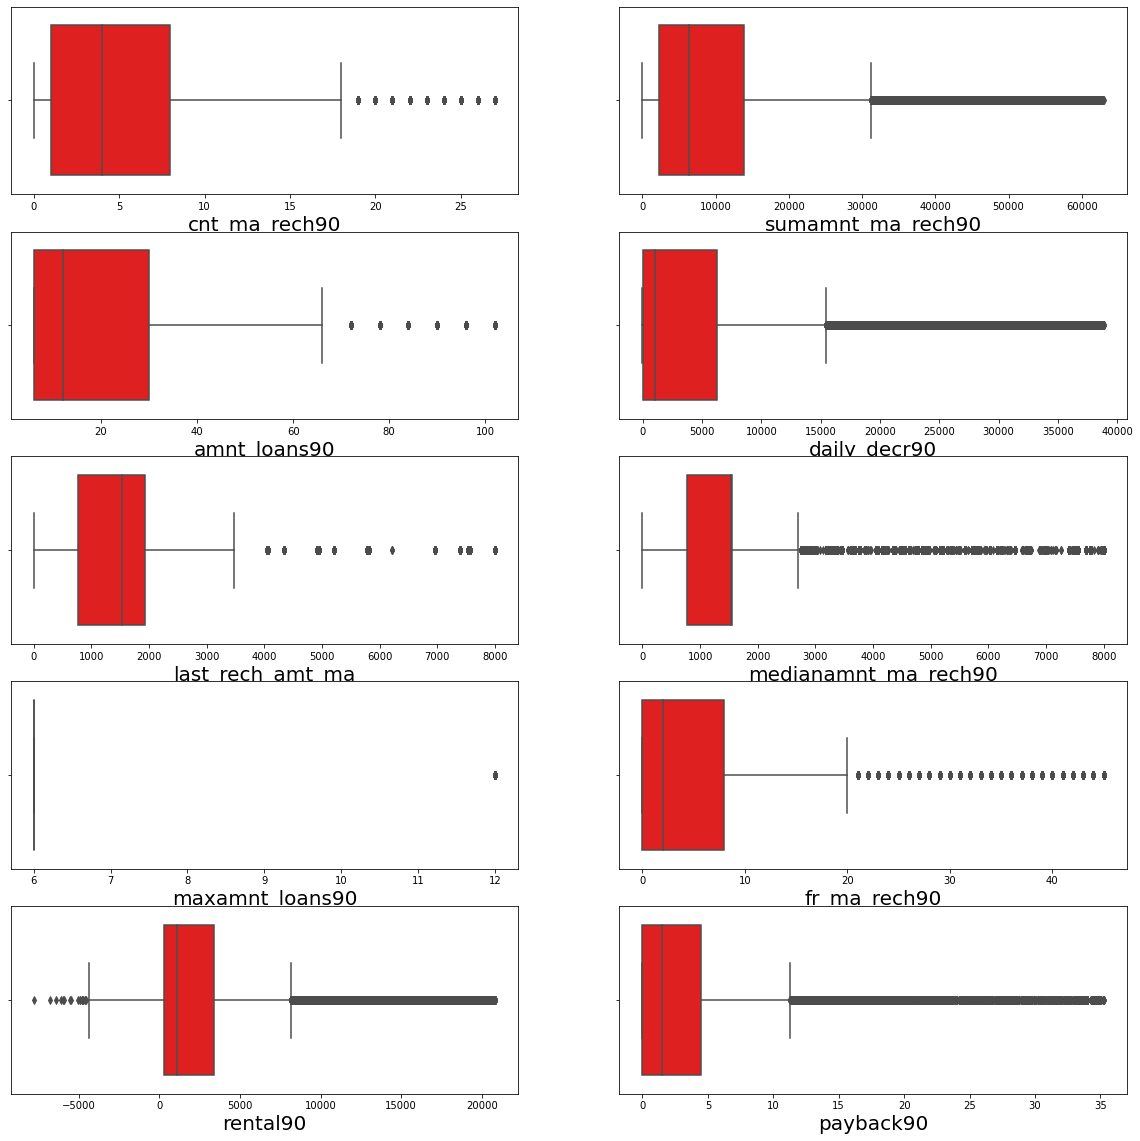

In [29]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in new_X:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(new_X[column], color="red")
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.show()

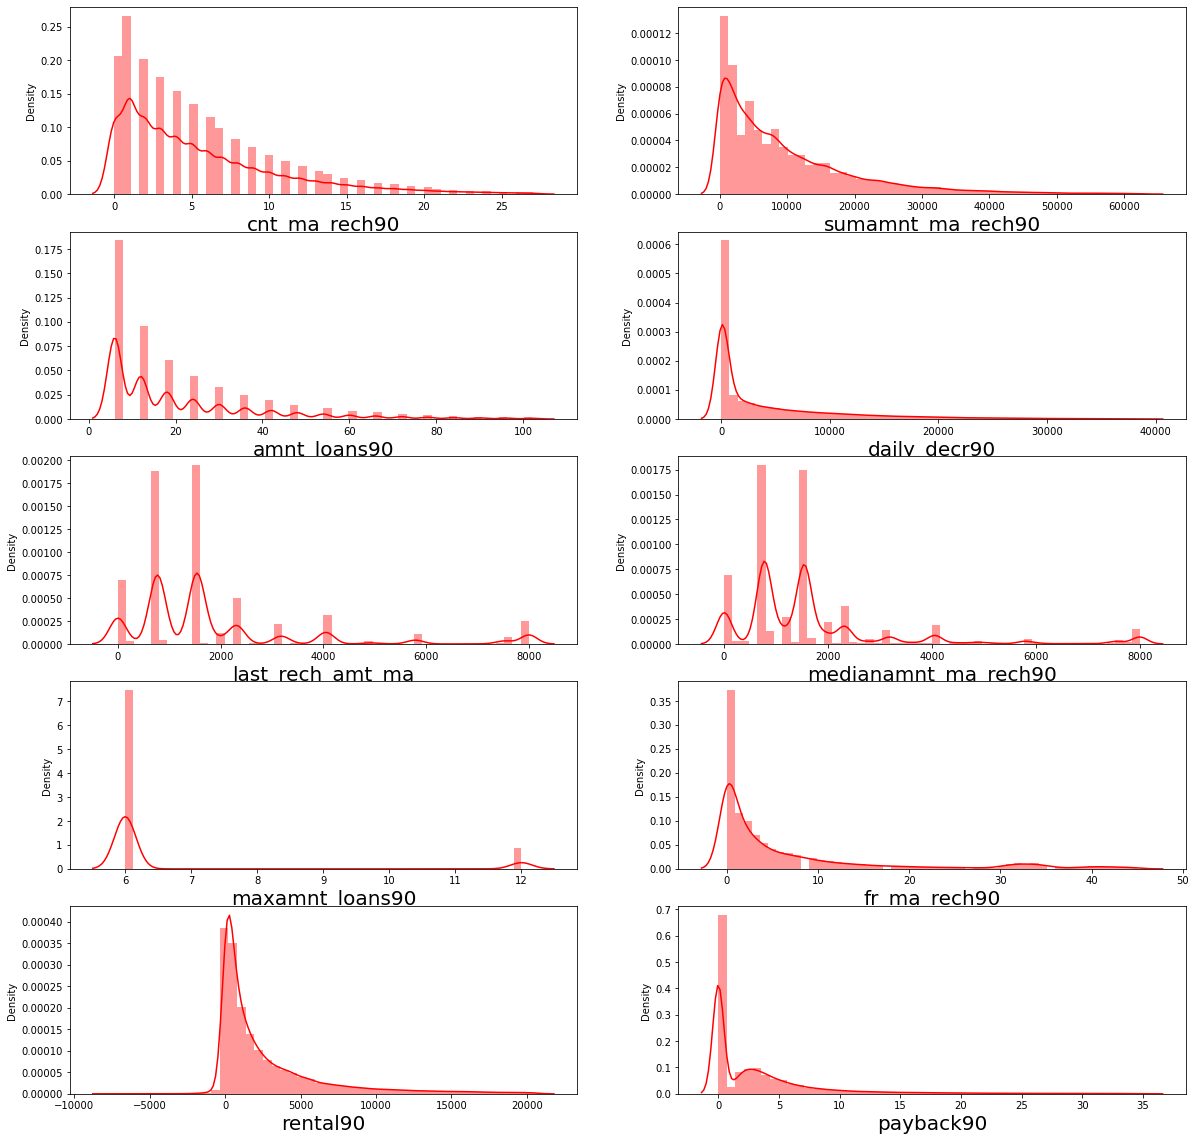

In [30]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in new_X:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(new_X[column], color="red")
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_X)

In [35]:
X_train,X_test,y_train,y_test =train_test_split(X_scalar,y, test_size=0.2, random_state=0)

In [36]:
rfc = RandomForestClassifier()

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_pred =rfc.predict(X_test)

In [40]:
print("confusion matrix","\n",confusion_matrix(y_test,y_pred))

print("\n","accuracy rf normal:",accuracy_score(y_test,y_pred))

print("\n","report :",classification_report(y_test,y_pred))

confusion matrix 
 [[ 2117  2741]
 [  962 30679]]

 accuracy rf normal: 0.898545165620976

 report :               precision    recall  f1-score   support

           0       0.69      0.44      0.53      4858
           1       0.92      0.97      0.94     31641

    accuracy                           0.90     36499
   macro avg       0.80      0.70      0.74     36499
weighted avg       0.89      0.90      0.89     36499



### Tunning the parameters using GridSearchCV

In [41]:
params ={'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
          'min_samples_split':[10,11],
           'min_samples_leaf':[5,6]}

In [42]:
grd =GridSearchCV(rfc,param_grid=params)

In [44]:
grd.fit(X_train,y_train)
print('best_params = ',grd.best_params_)

best_params =  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [45]:
rfc =grd.best_estimator_ 

In [46]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [47]:
y_pred =rfc.predict(X_test)

In [48]:
print("confusion matrix","\n",confusion_matrix(y_test,y_pred))

print("\n","accuracy rf normal:",accuracy_score(y_test,y_pred))

print("\n","report :",classification_report(y_test,y_pred))

confusion matrix 
 [[ 1937  2921]
 [  504 31137]]

 accuracy rf normal: 0.9061618126524015

 report :               precision    recall  f1-score   support

           0       0.79      0.40      0.53      4858
           1       0.91      0.98      0.95     31641

    accuracy                           0.91     36499
   macro avg       0.85      0.69      0.74     36499
weighted avg       0.90      0.91      0.89     36499



### plotting ROC and AUC for all the models

In [49]:
lr =LogisticRegression()
dt =DecisionTreeClassifier()
rfc =RandomForestClassifier()
kn =KNeighborsClassifier()

In [50]:
# training with all classifiers

lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
rfc.fit(X_train,y_train)
kn.fit(X_train,y_train)

print('All models are trained')

All models are trained


In [51]:
# all models score captured

lr.score(X_test,y_test)
dt.score(X_test,y_test)
rfc.score(X_test,y_test)
kn.score(X_test,y_test)

print('All models test score are captured')

All models test score are captured


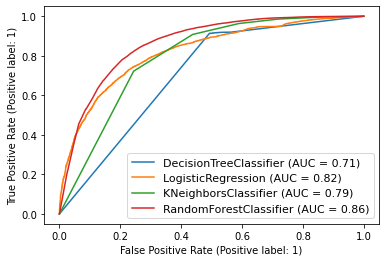

In [52]:
disp =plot_roc_curve(dt,X_test,y_test)

plot_roc_curve(lr,X_test,y_test,ax=disp.ax_) 

plot_roc_curve(kn,X_test,y_test,ax=disp.ax_)

plot_roc_curve(rfc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

plt.show()